In [1]:
# load ythe data from csv

import pandas as pd
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
Name: Drug, dtype: int64


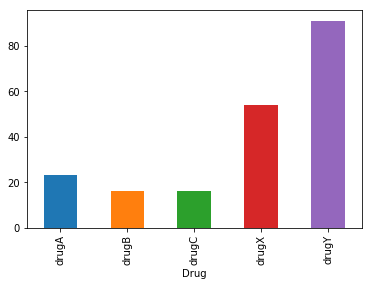

In [4]:
# categozire and check the values of each drug

data=df.groupby("Drug").Drug.count()
print(data)

import matplotlib.pyplot as plt
%matplotlib inline
data.plot.bar()
plt.show()

In [11]:
# conver the categorical data into numeric form

df['sex_n']=df['Sex'].factorize()[0]
df['bp_n']=df['BP'].factorize()[0]
df['cholesterol_n']=df['Cholesterol'].factorize()[0]
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug  sex_n  bp_n  cholesterol_n
0   23   F    HIGH        HIGH   25.355  drugY      0     0              0
1   47   M     LOW        HIGH   13.093  drugC      1     1              0
2   47   M     LOW        HIGH   10.114  drugC      1     1              0
3   28   F  NORMAL        HIGH    7.798  drugX      0     2              0
4   61   F     LOW        HIGH   18.043  drugY      0     1              0


In [13]:
# Extract the relevant columns

feature_names=['sex_n', 'bp_n','cholesterol_n','Age']
X=df[feature_names]
y=df[['Drug']]
print(X.head())
print(y.head())

   sex_n  bp_n  cholesterol_n  Age
0      0     0              0   23
1      1     1              0   47
2      1     1              0   47
3      0     2              0   28
4      0     1              0   61
    Drug
0  drugY
1  drugC
2  drugC
3  drugX
4  drugY


In [17]:
# normalize the data for better training

from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype('float'))
print(X[:5])

[[-1.040833   -1.11016894 -0.97043679 -1.29159102]
 [ 0.96076892  0.10979693 -0.97043679  0.16269866]
 [ 0.96076892  0.10979693 -0.97043679  0.16269866]
 [-1.040833    1.32976279 -0.97043679 -0.988614  ]
 [-1.040833    0.10979693 -0.97043679  1.0110343 ]]


In [18]:
# split the data for train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(150, 4) (50, 4)
(150, 1) (50, 1)


In [21]:
# Classification using Descision tree

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred[:5])

['drugY' 'drugY' 'drugY' 'drugX' 'drugY']


In [22]:
# Calculating accurancy of decision tree

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train, clf.predict(X_train))
test_acc=accuracy_score(y_test,y_pred)
print(train_acc)
print(test_acc)

0.6466666666666666
0.42


Max accurancy is at max_depth= 5
Max accuracy is :  0.56


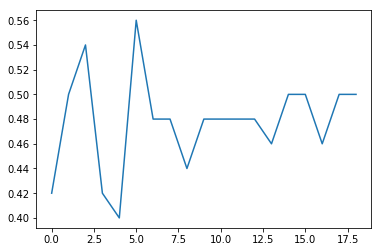

In [27]:
# calcualte the suitable value of the max_depth

score=[]
for d in range(1,20):
    clf=DecisionTreeClassifier(criterion="entropy", max_depth = d)
    clf.fit(X_train,y_train)
    score.append(accuracy_score(y_test,clf.predict(X_test)))
print("Max accurancy is at max_depth=",score.index(max(score)))
print("Max accuracy is : ",max(score) )

plt.plot(range(19), score)
plt.show()